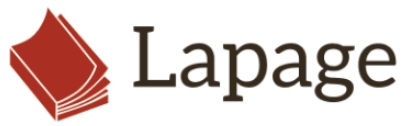

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des données</a>
 
**Partie 2 : Nettoyer les données**
 - <a href="#C2">Nettoyer les données</a>
  - <a href="#C2.1">Fichier `customers`</a>
   - <a href="#C2.2">Fichier `products`</a>
   - <a href="#C2.3">Fichier `transactions`</a>
   - <a href="#C2.4">Segmentation de la date</a>
    
**Partie 3 : Jointure des dataframes**
 - <a href="#C3.1">Jointure des dataframes `customers` et `products`</a>
 - <a href="#C3.2">Jointure des dataframes  `custo_transac` et `products`</a>
 - <a href="#C3.3">Analyse du probleme de jointure du `df_final`</a>
 - <a href="#C3.5">Mise en place d'une moyenne de prix pour la catégorie 0</a>
 - <a href="#C3.5">Nouvelle Jointure sans valeur null</a>
 - <a href="#C3.6">Ajout de l'age des clients dans le `df_final`</a>
 
**Partie 4 : Mission d'Antoine**
 - **<a href="#C4"> Mission d'Antoine *(description de la demande)*</a>**
 - <a href="#C4.1"> Analyse des différents indicateurs de vente</a>
 - <a href="#C4.2"> Indicateurs et graphiques du CA</a>
   - <a href="#C4.3">4.3 Graphiques sur les moyennes mobiles sur 7 jours</a>
   - <a href="#C4.4">4.4 Observation du mois d'Octobre 2021</a>
   - <a href="#C4.5">4.5 Graphique sur la répartition du CA  par catégorie en Octobre 2021</a>
 - <a href="#C4.6">Évolution du CA total par mois et moyenne mobile</a>
   - <a href="#C4.6a">4.6 Graphiques sur l'évolution du CA</a>
   - <a href="#C4.7">4.7 Calcul nombre de vente par catégorie et par année</a>
   - <a href="#C4.8">4.8  Graphique de la répartition du CA par catégorie dans le temps</a>
 - <a href="#C4.9">Les Tops et les Flops en CA et en ventes   </a>
   - <a href="#C4.10">4.9 / Top 10 des CA  </a>
   - <a href="#C4.11">4.10 / Top 10 des ventes</a>
 - <a href="#C4.12">Flop 10 des CA et des ventes</a>
   - <a href="#C4.13">4.11 / Flop 10 des CA</a>
   - <a href="#C4.14">4.12 / Flop 10 des ventes</a>
 - <a href="#C4.14">4.13 / La répartition par catégorie </a>
   - <a href="#C4.15">4.14 / Graphiques sur la répartition par catégorie</a>
 - <a href="#C4.16">Etude du profil des clients</a>
   - <a href="#C4.17">4.15 / Profil des clients selon l'âge </a>
   - <a href="#C4.18">4.16 / Graphique de la pyramide des âges</a>
   - <a href="#C4.19">4.17 / Répartition du CA entre les clients</a>
   - <a href="#C4.20">4.18 / Etude des clients les plus important dans le CA</a>
   - <a href="#C4.22">4.19 / Graphique 4 gros clients sur le CA</a>
 - <a href="#C4.23"> Création d'un df sans les  4 plus gros clients  `df_final_sgc` </a>  
    - <a href="#C4.24">4.21 / Graphique (courbe de Lorenz) avec et sans "SGC"   </a>
    - <a href="#C4.25">4.22 / Dissociation des femmes et des hommes (SGC)   </a>
    - <a href="#C4.26"> 4.23 /  Graphique de la répartition du CA par genre (SGC)  </a>
  
  **Partie 5 : Mission de Julie**
   - **<a href="#C5"> Mission de Julie *(description de la demande)*</a>**
   - <a href="#C5.1">Lien entre le genre et les catégories de livres achetés   </a>
     - <a href="#C5.2">5.2 /  Graphique Heatmap d'achats par catégorie selon le genre   </a>
     - <a href="#C5.3">5.3 /  Test de Khi-2   </a>
   - <a href="#C5.4">Lien entre l'âge et la catégorie des produits achetés   </a>
     - <a href="#C5.5">5.5 / Test de Shapiro  </a>
     - <a href="#C5.6">5.6 / Graphique Dispersion des âges par catégorie   </a>
     - <a href="#C5.7">5.7 / Test de Kolmogorov-Smirnov   </a>
     - <a href="#C5.8">5.8 / Test de Kruskal-Wallis   </a>
     - <a href="#C5.9">5.9 / Test Anova (essai)   </a>
   - <a href="#C5.10"> Lien entre l'age et le montant total des achats   </a>
     - <a href="#C5.11">5.11 / Graphique Montant total des achats par âge des clients   </a>
     - <a href="#C5.12">5.12 / Test de Pearson   </a>
   - <a href="#C5.13">Lien entre l'age et la fréquence d'achats  </a>
     - <a href="#C5.14">5.14 /Test de pearson    </a>
   - <a href="#C5.15">Lien entre l'âge et la taille du panier moyen   </a>
     - <a href="#C5.16">5.16 / Graphique entre l'âge et la taille du panier moyen    </a>
     - <a href="#C5.17">5.17 / Test de Pearson    </a>
   -**<a href="#C5.18">Conclusions de la mission    </a>**  

## Importation des Librairies

In [1]:
# Librairies de calcul
import pandas as pd
import numpy as np

# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies de statistiques
from scipy import stats
from scipy.stats import shapiro
import scipy.stats as st
from scipy.stats import kstest
from scipy.stats import fisher_exact
from scipy.stats import pearsonr

# Ignorer les warnings 
import warnings
warnings.simplefilter("ignore")

## Importation des fichiers

In [2]:
# import des fichiers
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

# <a name="C2">Partie 2 _ Nettoyer les données</a>

## <a name="C2.1"><font color='black'>2.1 Fichier `customers`</font></a>

In [3]:
# On observe les 5 premières lignes du dataFrame
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Obtenir les détails essentiels sur notre dataFrame
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
# Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame 
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [6]:
# Obtenir le nombre de lignes et le nombre de colonnes
customers.shape

(8623, 3)

In [7]:
#Vérification des doublons
customers.duplicated(['client_id']).sum()

0

In [8]:
# Vérification des valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Le fichier `customers` ne présente pas de doublons ni d'érreurs.

## <a name="C2.2"><font color='black'>2.2 Fichier `products`</font></a>

In [9]:
# On observe les 5 premieres lignes 
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
# On regarde le nombre de lignes et de colonnes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
# Analyse des données pour une étude plus approfondie
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


<font color='darkred'>*il y a des valeurs  -1 en minimum*</font>

In [12]:
# # On observe le nombre de lignes et de colonnes
products.shape

(3287, 3)

In [13]:
# Vérification des valeurs manquantes
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [14]:
# Trouver qu'il y a combien de valeur '-1' pour la colonne 'price'
products.loc[products['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [15]:
# Supprimer la ligne avec le prix '-1' 
products.drop(products.index[731], inplace=True)

In [16]:
# Verifier si le '-1' est bien supprimé
products.describe(include="all")

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


In [17]:
#Vérification des valeurs manquantes
products.categ.isna().values.any()

False

In [18]:
products[products.isna().any(axis=1)]

,id_prod,price,categ


In [19]:
products_nulle = products[products['categ'].isna()]
products_nulle

,id_prod,price,categ


In [20]:
# modification des valeurs f par Femme et h par Homme
customers['sex'] = customers['sex'].replace({'m': 'Homme', 'f': 'Femme'})
customers.head()

,client_id,sex,birth
0,c_4410,Femme,1967
1,c_7839,Femme,1975
2,c_1699,Femme,1984
3,c_5961,Femme,1962
4,c_5320,Homme,1943


<font color='darkred'>*Le fichier products n'a plus de valeurs négatives*</font>

Le fichier `products` ne présente plus de doublons ni d'érreurs.

## <a name="C2.3"><font color='black'>2.3 Fichier `transactions`</font></a>

In [21]:
# On observe les 5 premieres lignes 
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [22]:
# On regarde le nombre de lignes et de colonnes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [23]:
# Analyse des données pour une étude plus approfondie
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<font color='darkred'>*Il y a eu des tests réalisés qui n'ont pas été supprimés.*</font>

In [24]:
# Obtenir le nombre de lignes et le nombre de colonnes
transactions.shape

(679532, 4)

In [25]:
# On cherche des doublons
tests_transactions = transactions.loc[transactions.duplicated(keep=False),:]
tests_transactions.head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0


<font color='darkred'>*Dans la colonne id_prod les 'T_0' sont des tests*</font>

In [26]:
# Isoler les tests
tests_prod = transactions.loc[ transactions['id_prod']=='T_0',:]
tests_prod

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [27]:
# Vérification de l'unicité des éléments 
tests_prod.client_id.unique()

array(['ct_0', 'ct_1'], dtype=object)

In [28]:
# Isoler les
tests_prod_ct_1 = transactions.loc[ transactions['client_id']=='ct_1',:]
tests_prod_ct_1

,id_prod,date,session_id,client_id
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
35433,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1
38646,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_1
...,...,...,...,...
648864,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


<font color='darkred'>*Il y a 200 lignes de tests*</font>

In [29]:
# On supprime les lignes de test
transactions = transactions.drop(tests_prod.index)

In [30]:
# On regarde le nombre de lignes dans les colonnes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


<font color='darkred'>Les lignes de tests ont été supprimées</font>

In [31]:
# Verifier les doublons avec toutes les colonnes.
transactions.duplicated().sum()

0

Le fichier `products` ne présente plus de doublons ni d'érreurs.

##  <a name="C2.4"><font color='black'>2.4 Segmentation de la date</font></a>

In [32]:
# Créer un espace dans la ligne date
transactions[['date','number']]=transactions['date'].str.split('.', expand=True)
transactions.head()

,id_prod,date,session_id,client_id,number
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,043970
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,149409
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,155329
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,835891
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,194479


In [33]:
# Créer des colonnes pour chaques éléments de la date
transactions['heure'] = pd.to_datetime(transactions['date']).dt.time
transactions['date'] = pd.to_datetime(transactions['date']).dt.date
transactions['annee'] = pd.to_datetime(transactions['date']).dt.year
transactions['mois'] = pd.to_datetime(transactions['date']).dt.month
transactions['jour'] = pd.to_datetime(transactions['date']).dt.day
transactions['annee_mois'] = pd.to_datetime(transactions['date']).dt.strftime('%Y-%m')
transactions.head()

,id_prod,date,session_id,client_id,number,heure,annee,mois,jour,annee_mois
0,0_1518,2022-05-20,s_211425,c_103,043970,13:21:29,2022,5,20,2022-05
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18,2022-06
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11,2023-01


Le fichier `transactions` ne présente plus de doublons ni d'érreurs.

# <a name="C3">Partie 3 _ Jointure des dataframes</a>

##  <a name="C3.1"><font color='black'>3.1 Jointure des dataframes  `customers` et `transactions`</font></a>

In [34]:
# Création de la jointure entre customers et transactions
custo_transac = pd.merge(customers, transactions, on = 'client_id', how='right')
custo_transac.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02
2,c_6714,Femme,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,2022-06
3,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06
4,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01


##  <a name="C3.2"><font color='black'>3.2 Jointure des dataframes  `custo_transac` et `products`</font></a>

In [35]:
df_final = pd.merge(custo_transac, products, on = 'id_prod', how='left',indicator = True)
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05,4.18,0.0,both
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02,15.99,1.0,both
2,c_6714,Femme,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,2022-06,7.99,0.0,both
3,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06,69.99,2.0,both
4,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01,4.99,0.0,both


In [36]:
# On regarde si la colonne _merge contient autre chose que des 'both'
test_join = df_final[df_final['_merge']!='both']

# On observe
print(test_join.shape)
test_join.head()

(221, 15)


,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge
2633,c_4746,Homme,1940,0_2245,2022-09-23,s_272266,636773,07:22:38,2022,9,23,2022-09,NaN,NaN,left_only
10103,c_6713,Femme,1963,0_2245,2022-07-23,s_242482,133889,09:24:14,2022,7,23,2022-07,NaN,NaN,left_only
11723,c_5108,Homme,1978,0_2245,2022-12-03,s_306338,696673,03:26:35,2022,12,3,2022-12,NaN,NaN,left_only
15670,c_1391,Homme,1991,0_2245,2021-08-16,s_76493,481411,11:33:25,2021,8,16,2021-08,NaN,NaN,left_only
16372,c_7954,Homme,1973,0_2245,2022-07-16,s_239078,627491,05:53:01,2022,7,16,2022-07,NaN,NaN,left_only


##  <a name="C3.3"><font color='black'>3.3 Analyse du probleme de jointure du `df_final`</font></a>

In [37]:
# On regarde les lignes en plus dans "_merge"
df_final['_merge'].value_counts()

both          679111
left_only        221
right_only         0
Name: _merge, dtype: int64

In [38]:
# Vérification si  des valeurs manquantes
df_final.isnull().sum()

client_id       0
sex             0
birth           0
id_prod         0
date            0
session_id      0
number          0
heure           0
annee           0
mois            0
jour            0
annee_mois      0
price         221
categ         221
_merge          0
dtype: int64

In [39]:
# On va isoler les valeurs manquantes
df_final_null = df_final.loc[df_final.price.isnull()]
print(df_final_null.shape)
df_final_null.head()

(221, 15)


,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge
2633,c_4746,Homme,1940,0_2245,2022-09-23,s_272266,636773,07:22:38,2022,9,23,2022-09,NaN,NaN,left_only
10103,c_6713,Femme,1963,0_2245,2022-07-23,s_242482,133889,09:24:14,2022,7,23,2022-07,NaN,NaN,left_only
11723,c_5108,Homme,1978,0_2245,2022-12-03,s_306338,696673,03:26:35,2022,12,3,2022-12,NaN,NaN,left_only
15670,c_1391,Homme,1991,0_2245,2021-08-16,s_76493,481411,11:33:25,2021,8,16,2021-08,NaN,NaN,left_only
16372,c_7954,Homme,1973,0_2245,2022-07-16,s_239078,627491,05:53:01,2022,7,16,2022-07,NaN,NaN,left_only


In [40]:
# On vérifie si toutes les lignes ont le meme id_prod
df_final_null.id_prod.unique()

array(['0_2245'], dtype=object)

#### Nous retrouvons 0_2245 dans la colonne id_prod

#### Il y a un probleme dans la jointure de "price" et de "categ"

#### Pour corriger ce probleme nous allons affecter aux valeurs null dans 'price' le prix moyen de sa catégorie et pour les valeurs null dans "categ" affecter le numéro de sa catégorie.

##  <a name="C3.4"><font color='black'>3.4 Mise en place d'une moyenne de prix pour la catégorie 0 </font></a>

#### Calcul de la moyenne de prix de la catégorie 0 afin de l'insérer à place des NaN directemement dans le fichier "products"

In [41]:
products = products.append({'id_prod':'0_2245', 'price':products[products.categ==0].mean()['price'], 'categ':0}, ignore_index=True)

<font color='darkred'>Dans le fichier `products` la modification est faite, en affectant la catégorie '0' au valeurs nulles et la moyenne de prix concernant cette catégorie.</font>

##  <a name="C3.5"><font color='black'>3.5 Nouvelle Jointure sans valeurs nulles</font></a>

In [42]:
# Création de la jointure entre customers et transactions
custo_transac = pd.merge(customers, transactions, on = 'client_id', how='right')
custo_transac.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02
2,c_6714,Femme,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,2022-06
3,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06
4,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01


In [43]:
df_final = pd.merge(custo_transac, products, on = 'id_prod', how='left',indicator = True)
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05,4.18,0,both
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02,15.99,1,both
2,c_6714,Femme,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,2022-06,7.99,0,both
3,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06,69.99,2,both
4,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01,4.99,0,both


In [44]:
df_final.categ.unique()

array([0, 1, 2], dtype=int64)

**<font color='darkred'>Les valeurs NaN ont disparues pour dans les colonnes `categ`et`price`</font>**

##  <a name="C3.6"><font color='black'>3.6 Ajout de l'age des clients dans le `df_final`</font></a>

#### Ajout de l'age des clients

In [45]:
# Créer une colonne avec l'age
df_final['age'] = df_final['annee'] - df_final['birth']
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge,age
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05,4.18,0,both,36
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02,15.99,1,both,34
2,c_6714,Femme,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,2022-06,7.99,0,both,54
3,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06,69.99,2,both,21
4,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01,4.99,0,both,43


# <a name="C4">Partie 4 Mission d'Antoine</a>

Je vais avoir besoin de :
- Différents indicateurs et graphiques autour du chiffre d'affaires. 
- Regarder l’évolution dans le temps.
- Mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.  
&nbsp;
- Regarder les tops et les flops.
- La répartition par catégorie.  
&nbsp;
- Informations sur les profils clients.
- La répartition du chiffre d'affaires entre les clients (courbe de Lorenz).

#  <a name="C4.1"><font color='black'> Analyse des différents indicateurs de vente</font></a>

## <a name="C4.1"><font color='black'>4.1 Indicateurs et graphiques du CA</font></a>

In [46]:
# Création d'un dataframe avec le prix et la date
df_ca = df_final[['date','price']]
df_ca.head()

,date,price
0,2022-05-20,4.18
1,2022-02-02,15.99
2,2022-06-18,7.99
3,2021-06-24,69.99
4,2023-01-11,4.99


In [47]:
# Grouper la somme des prix par jour (.reset_index() remet l'index en place)
df_ca_jour = df_ca.groupby('date').sum().reset_index()
df_ca_jour.head()

,date,price
0,2021-03-01,16576.952795
1,2021-03-02,15498.182795
2,2021-03-03,15198.690000
3,2021-03-04,15196.070000
4,2021-03-05,17471.370000


 ### <a name="C4.2"><font color='black'>4.2 Calcul de la moyenne mobile sur 7 jours</font></a>

In [48]:
# on calcul la moyenne sur 7 Jours
df_ca_jour['moyenne_mobile_7'] = df_ca_jour['price'].rolling(7,min_periods=1).mean()
df_ca_jour.head()

,date,price,moyenne_mobile_7
0,2021-03-01,16576.952795,16576.952795
1,2021-03-02,15498.182795,16037.567795
2,2021-03-03,15198.690000,15757.941863
3,2021-03-04,15196.070000,15617.473897
4,2021-03-05,17471.370000,15988.253118


### <a name="C4.3"><font color='black'>4.3 Graphiques sur les moyennes mobiles sur 7 jours</font></a>

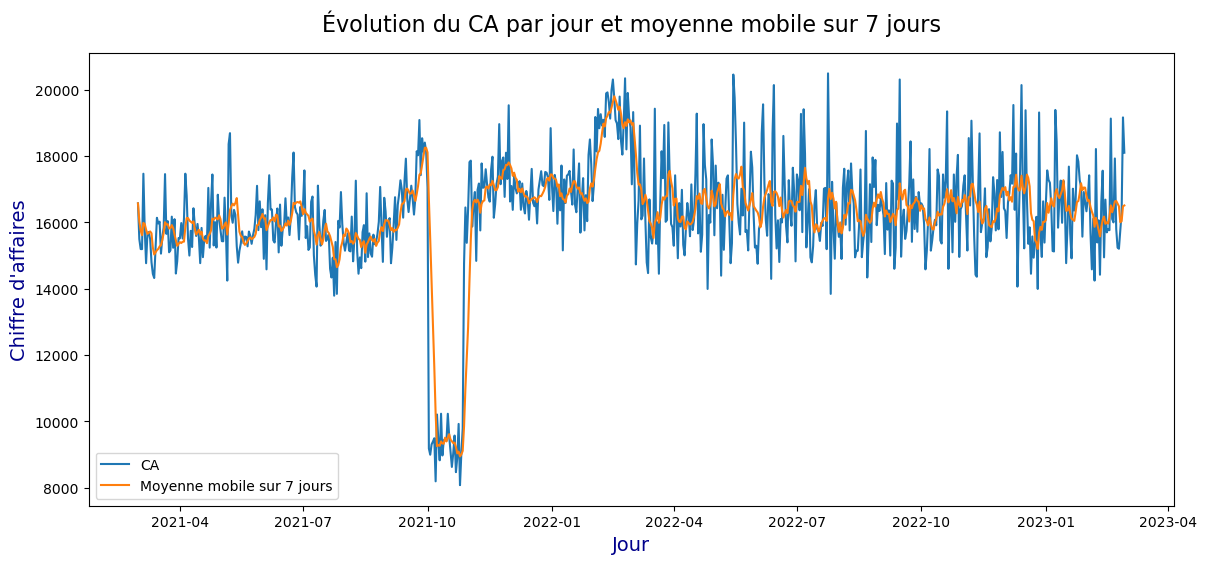

In [49]:
# Mise en place de graphiques sur les moyennes mobiles
plt.figure(figsize =(14,20 ))

# Visualisation de l'évolution du CA par jour et de la moyenne mobile sur 7 jours
plt.subplot(3,1,1)
plt.plot(df_ca_jour.date, df_ca_jour.price,label='CA' )
plt.plot(df_ca_jour.date, df_ca_jour.moyenne_mobile_7 ,label='Moyenne mobile sur 7 jours' )                     
plt.xlabel("Jour", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 7 jours', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')

Il y a une chute du CA au mois d'Octobre 2021.

### <a name="C4.4"><font color='black'>4.4 Observation du mois d'Octobre 2021</font></a>

In [50]:
df_octobre_2021 = df_final.loc[ df_final.annee_mois== "2021-10", ["jour", "price","categ"]]
df_octobre_2021.head()

,jour,price,categ
68,2,4.99,0
71,3,15.99,0
80,13,17.01,0
86,24,4.63,0
93,5,5.99,0


In [51]:
# Créer une dataframe pivot pour le CA par catégorie de produit par jour pour octobre 2021.
df_octobre_2021_v2 = pd.pivot_table(df_octobre_2021, index = ['jour'], columns = 'categ', values = 'price',aggfunc= 'sum', fill_value = 0)
df_octobre_2021_v2.head()

categ,0,1,2
jour,,,
1,6950.500000,7003.79,3104.05
2,7141.010000,0.00,2041.12
3,6786.570000,0.00,2206.48
4,6557.065589,0.00,2746.08
5,6357.910000,0.00,3032.55


### <a name="C4.5"><font color='black'>4.5 Graphique sur la répartition du CA  par catégorie en Octobre 2021</font></a>

Text(0, 0.5, "Chiffre d'affaires")

<Figure size 1300x600 with 0 Axes>

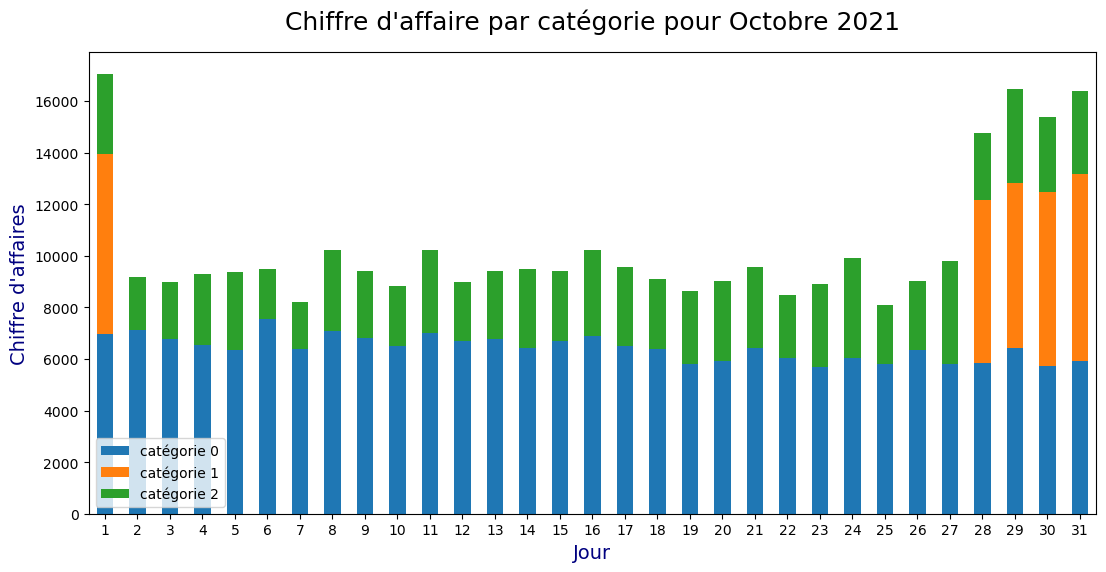

In [52]:
# Visualisation de la répartition du CA par catégorie en Octobre 2021
fig = plt.figure(figsize =(13,6 ))
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
df_octobre_2021_v2.plot.bar(figsize=(13,6), stacked=True, rot=0)
plt.title("Chiffre d'affaire par catégorie pour Octobre 2021",fontsize = 18, color = 'black',y =1.03)
plt.xlabel("Jour", fontsize = 14, color = 'navy')
plt.legend(labels=categories, loc='lower left')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'navy')

#### Conclusion

Il y a une disparition de la catégorie 1 entre le 02 et le 27 Octobre 2021.

## <a name="C4.6"><font color='black'>4.6 Évolution du CA total par mois et moyenne mobile</font></a>

### Calcul CA par  mois

In [53]:
# Créer une dataframe avec la date aaaa-mm et le prix
df_ca_anne_mois = df_final[['annee_mois', 'price']]

# Calculer la somme des prix par mois
df_ca_mois = df_ca_anne_mois.groupby('annee_mois').sum().reset_index()
df_ca_mois.head()

,annee_mois,price
0,2021-03,482546.205152
1,2021-04,476273.559125
2,2021-05,493037.332357
3,2021-06,484170.689562
4,2021-07,482882.331179


### Calcul CA  par année

In [54]:
# Créer une dataframe avec la date aaaa
df_ca_annee = df_final[['annee', 'price']]
# Grouper la somme des prix par mois
df_ca_annee = df_ca_annee.groupby('annee').sum().reset_index()
df_ca_annee

,annee,price
0,2021,4.771847e+06
1,2022,6.110090e+06
2,2023,9.743846e+05


### <a name="C4.6a"><font color='black'>4.6 Graphiques sur l'évolution du CA </font></a>

Text(0.5, 1.0, "Le Chiffre d'afffaire des 3 dernieres années")

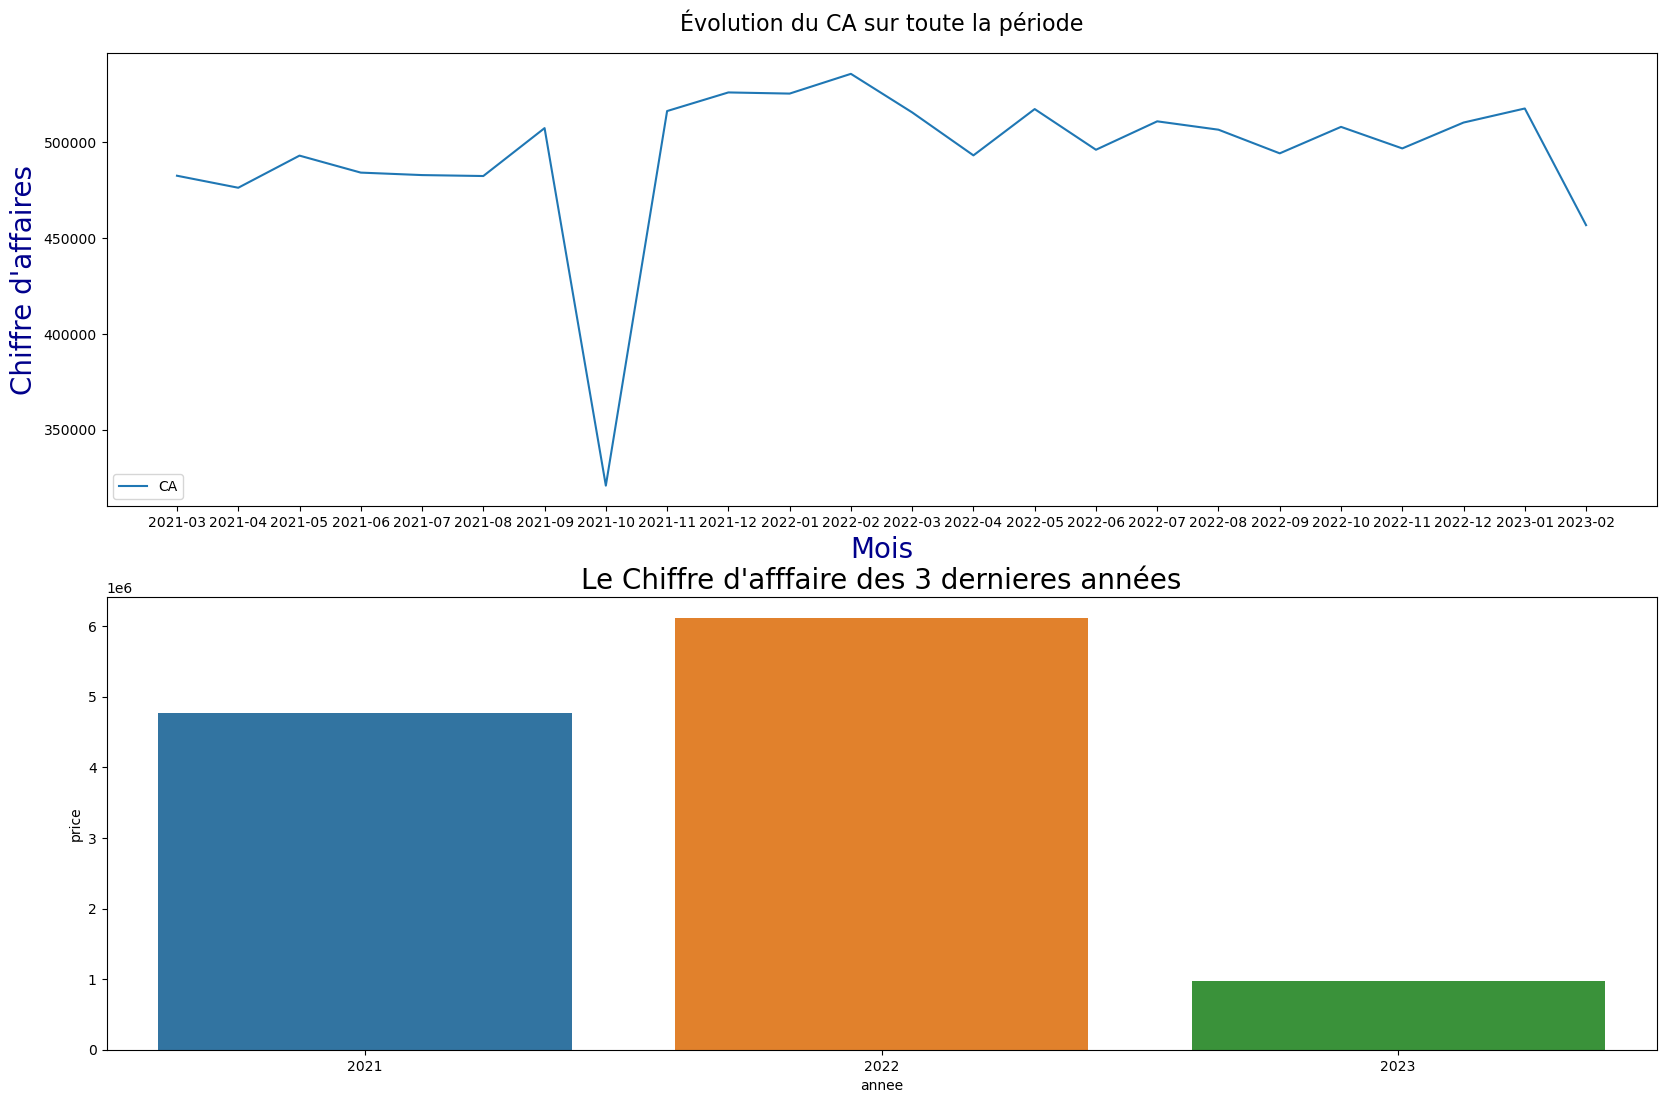

In [55]:
# Mise en place de graphiques sur l'évolution du CA '
plt.figure(figsize =(20,20 ))

# Visualisation de l'évolution du CA 
ax1 = plt.subplot(3,1,1)
plt.plot(df_ca_mois.annee_mois, df_ca_mois.price,label='CA' )
                  
plt.xlabel("Mois", fontsize = 20, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 20, color = 'darkblue')
plt.title('Évolution du CA sur toute la période', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')


# Graphique des moyennes des prix de ventes par catégorie
ax2 = plt.subplot(3,1,2)
sns.barplot(x='annee', y='price', data = df_ca_annee)
plt.title("Le Chiffre d'afffaire des 3 dernieres années", fontsize = 20, color = 'black')

### Conclusion

#### Il ya une chute du chiffre d'affaire global sur l'année 2023

### <a name="C4.7"><font color='black'>4.7 Calcul nombre de vente par catégorie et par année </font></a>

In [56]:
# Créer une dataframe avec les colonnes necessaires
df_vente = df_final[['id_prod', 'categ','price','annee_mois','age']]
df_vente.head()

,id_prod,categ,price,annee_mois,age
0,0_1518,0,4.18,2022-05,36
1,1_251,1,15.99,2022-02,34
2,0_1277,0,7.99,2022-06,54
3,2_209,2,69.99,2021-06,21
4,0_1509,0,4.99,2023-01,43


In [57]:
# Dataframe pour calculer les ventes par catégorie
df_vente_categ = df_vente.groupby(['id_prod', 'categ','annee_mois','price']).size().reset_index()
df_vente_categ = df_vente_categ.rename(columns={0:'ventes'})
df_vente_categ.head()

,id_prod,categ,annee_mois,price,ventes
0,0_0,0,2021-03,3.75,40
1,0_0,0,2021-04,3.75,73
2,0_0,0,2021-05,3.75,58
3,0_0,0,2021-06,3.75,52
4,0_0,0,2021-07,3.75,49


In [58]:
# Dataframe calculer le total des ventes par catégorie
df_vente_categ_total  = df_vente_categ.groupby('categ').sum().reset_index()
df_vente_categ_total

,categ,price,ventes
0,0,443136.327071,415680
1,1,348787.530000,227169
2,2,414915.430000,36483


In [59]:
# Dataframe calculer le total des prix par catégorie
df_prix_categ_total = df_vente_categ_total[['categ','price']]
df_prix_categ_total

,categ,price
0,0,443136.327071
1,1,348787.530000
2,2,414915.430000


In [60]:
# Moyenne des prix de vente par catégorie
mean_categ = df_final.groupby('categ')[['price']].mean().reset_index()
mean_categ

,categ,price
0,0,10.638770
1,1,20.485730
2,2,76.207412


In [61]:
# Dataframe calculer le total des ventes par catégorie
nbr_vente_categ = df_vente_categ_total[['categ','ventes']]
nbr_vente_categ

,categ,ventes
0,0,415680
1,1,227169
2,2,36483


### <a name="C4.8"><font color='black'>4.8 / Graphique de la répartition du CA par catégorie dans le temps</font></a>

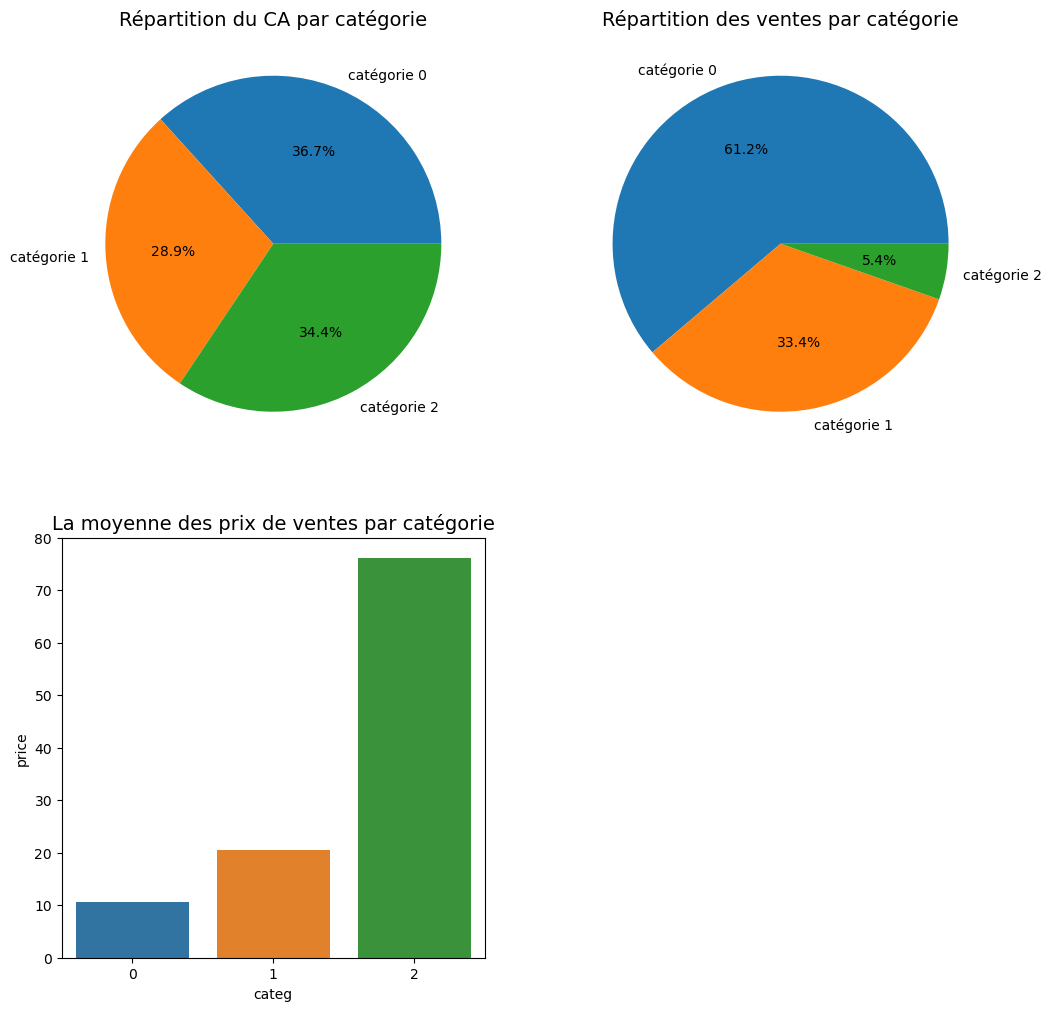

In [62]:
# Graphique de la répartition du CA par catégorie dans le temps
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(12,12 ))

ax1 = plt.subplot(2,2,1)
patches, l_text, p_text=plt.pie(x= df_prix_categ_total['price'], labels= categories, autopct='%1.1f%%' )
plt.title('Répartition du CA par catégorie', fontsize = 14, color = 'black')
plt.savefig("Répartition_du_CA_par_catégorie.png", dpi=200, bbox_inches = 'tight')

# Graphique de la répartition des ventes par catégorie 
ax2 = plt.subplot(2,2,2)
patches, l_text, p_text=plt.pie(x= nbr_vente_categ['ventes'], labels= categories, autopct='%1.1f%%' )
plt.title('Répartition des ventes par catégorie', fontsize = 14, color = 'black')
plt.savefig("Répartition_des_ventes_par_catégorie.png", dpi=200, bbox_inches = 'tight')

# Graphique des moyennes des prix de ventes par catégorie
ax3 = plt.subplot(2,2,3)
sns.barplot(x='categ', y='price', data = mean_categ)
plt.title('La moyenne des prix de ventes par catégorie', fontsize = 14, color = 'black')
plt.savefig("La_moyenne_des_prix_de_ventes_par_catégorie.png", dpi=200, bbox_inches = 'tight')

### Conclusion 

- Il ya une répartition homogéne du CA par catégorie
- La répartition des ventes est en majorité par  la catégorie 0 avec 61%
- La moyenne des prix explose en catégorie 2

## <a name="C4.9"><font color='black'> Les Tops et les Flops en CA et en ventes</font></a>

### <a name="C4.10"><font color='black'> 4.9 / Top 10 des CA</font></a>

In [63]:
# Dataframe comportant le produit et le prix
ca_products = df_final.groupby(['id_prod','categ'])['price'].sum().reset_index()

# les 10 articles avec le grand CA
top_ca_10 = ca_products.sort_values('price', ascending=False).head(10)
top_ca_10

,id_prod,categ,price
3097,2_159,2,94893.50
3071,2_135,2,69334.95
3046,2_112,2,65407.76
3035,2_102,2,60736.78
3153,2_209,2,56971.86
2620,1_395,1,54356.25
2592,1_369,1,54025.48
3044,2_110,2,53846.25
3202,2_39,2,53060.85
3105,2_166,2,52449.12


### <a name="C4.11"><font color='black'> 4.10 / Top 10 des ventes</font></a>

In [64]:
# Dataframe comportant le produit et les ventes
top_ventes = df_vente_categ.groupby(['id_prod','categ'])['ventes'].sum().reset_index()

# les 10 articles les plus vendus
top_10_ventes = top_ventes.sort_values('ventes', ascending=False).head(10)
top_10_ventes

,id_prod,categ,ventes
2592,1_369,1,2252
2645,1_417,1,2189
2642,1_414,1,2180
2734,1_498,1,2128
2654,1_425,1,2096
2630,1_403,1,1960
2640,1_412,1,1951
2641,1_413,1,1945
2633,1_406,1,1939
2634,1_407,1,1935


In [65]:
ca_10 = 100*top_ca_10.price.sum()/ca_products.price.sum()
print ("Le total du top 10 produits en terme de CA apporte ", round(ca_10,2), "% du CA total.")

Le total du top 10 produits en terme de CA apporte  5.19 % du CA total.


In [66]:
ventes_10 = 100*top_10_ventes.ventes.sum()/top_ventes.ventes.sum()
print ("Les 10 produits en terme de ventes apporte ", round(ventes_10,2), "% des ventes totales.")

Les 10 produits en terme de ventes apporte  3.03 % des ventes totales.


## <a name="C4.12"><font color='black'> Flop 10 des CA et des ventes</font></a>

### <a name="C4.13"><font color='black'>4.11 / Flop 10 des CA</font></a>

In [67]:
# les 10 articles avec le CA e plus bas
flop_ca_10 = ca_products.sort_values('price').head(10)
flop_ca_10

,id_prod,categ,price
595,0_1539,0,0.99
313,0_1284,0,1.38
719,0_1653,0,1.98
1785,0_541,0,1.99
2080,0_807,0,1.99
665,0_1601,0,1.99
802,0_1728,0,2.27
549,0_1498,0,2.48
2180,0_898,0,2.54
925,0_1840,0,2.56


### <a name="C4.14"><font color='black'>4.12 / Flop 10 des ventes</font></a>

In [68]:
# les 10 articles les moins vendus
flop_10_ventes = top_ventes.sort_values('ventes').head(10)
flop_10_ventes.head(10)

,id_prod,categ,ventes
1793,0_549,0,1
1327,0_2201,0,1
3176,2_23,2,1
313,0_1284,0,1
752,0_1683,0,1
2109,0_833,0,1
3264,2_98,2,1
698,0_1633,0,1
665,0_1601,0,1
3248,2_81,2,1


### <a name="C4.15"><font color='black'>4.13 / La répartition par catégorie</font></a>

In [69]:
# Les produits qui apportent le plus de CA par catégorie
df_ca_plus = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'price',aggfunc=np.sum).reset_index()
ca_plus = df_ca_plus.sort_values('price', ascending=False).groupby('categ', as_index=False).first()
ca_plus

,categ,id_prod,price
0,0,0_1441,23452.65
1,1,1_395,54356.25
2,2,2_159,94893.50


In [70]:
# Les produits qui se sont vendus le plus par catégorie
df_vente_plus = pd.pivot_table(top_ventes, index = ['id_prod', 'categ'], values = 'ventes',aggfunc=np.sum).reset_index()
vente_plus= df_vente_plus.sort_values('ventes', ascending=False).groupby('categ', as_index=False).first()
vente_plus

,categ,id_prod,ventes
0,0,0_1422,1292
1,1,1_369,2252
2,2,2_102,1027


### <a name="C4.16"><font color='black'>4.14 / Graphiques sur la répartition par catégorie</font></a>

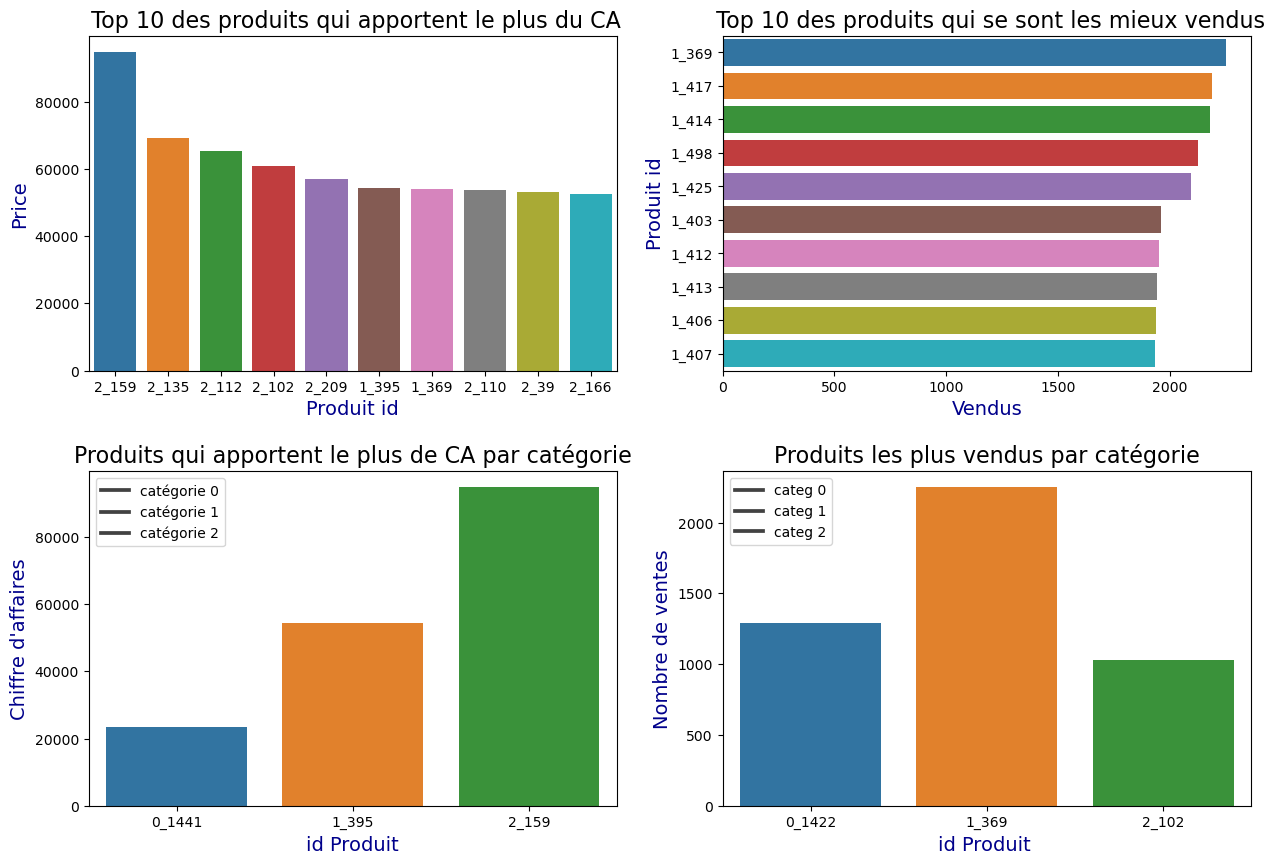

In [71]:
fig = plt.figure(figsize =(15,10))
plt.subplots_adjust(hspace=0.3)

# Visualisation du Top 10 en terme de CA
ax1 =  plt.subplot(2,2,1)
sns.barplot(x='id_prod', y = 'price', data = top_ca_10  )
plt.xlabel("Produit id",fontsize = 14, color = 'darkblue')
plt.ylabel("Price", fontsize = 14, color = 'darkblue')
plt.title(" Top 10 des produits qui apportent le plus du CA", fontsize = 16, color = 'black')
plt.savefig("Top_10_des_produits_qui_apportent_le_plus_du_CA.png", dpi=200, bbox_inches = 'tight')

# Visualisation du Top 10 en terme de nombre de ventes
ax2 = plt.subplot(2,2,2)
sns.barplot(x='ventes', y = 'id_prod', data = top_10_ventes  )
plt.xlabel("Vendus",fontsize = 14, color = 'darkblue')
plt.ylabel("Produit id", fontsize = 14, color = 'darkblue')
plt.title(" Top 10 des produits qui se sont les mieux vendus", fontsize = 16, color = 'black')
plt.savefig("Top_10_des_produits_qui_se_sont_les_mieux_vendus.png", dpi=200, bbox_inches = 'tight')

categ = ['categ 0', 'categ 1', 'categ 2']
# Visualisation des produits qui apportent le plus de CA par catégorie
ax3 = plt.subplot(2,2,3)
sns.barplot(x='id_prod', y = 'price', data = ca_plus, )
plt.xlabel("id Produit",fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title("Produits qui apportent le plus de CA par catégorie", fontsize = 16, color = 'black')
plt.legend(labels=categories, loc='upper left')
plt.savefig("Produits_qui_apportent_le_plus_de_CA_par_catégorie.png", dpi=200, bbox_inches = 'tight')

# Visualisation des produits les plus vendus par catégorie 
ax4 = plt.subplot(2,2,4)
sns.barplot(x='id_prod', y = 'ventes', data = vente_plus  )
plt.xlabel("id Produit ",fontsize = 14, color = 'darkblue')
plt.ylabel("Nombre de ventes", fontsize = 14, color = 'darkblue')
plt.title("Produits les plus vendus par catégorie", fontsize = 16, color = 'black')
plt.legend(labels=categ, loc='upper left')
plt.savefig("Produits_les_plus_vendus_par_catégorie.png", dpi=200, bbox_inches = 'tight')

# <a name="C4.17"><font color='black'> Etude du profil des clients</font></a>

### <a name="C4.18"><font color='black'>4.15 / Profil des clients selon l'âge</font></a>

Femme

In [72]:
# Ajout de l'age afin de comparer les différences de genre
customers['age'] = 2023 - customers['birth']
customers.head(3)

,client_id,sex,birth,age
0,c_4410,Femme,1967,56
1,c_7839,Femme,1975,48
2,c_1699,Femme,1984,39


In [73]:
femme = customers[customers.sex=='Femme']
femme['group'] = pd.cut(femme['age'],bins=[0,18,25,35,45,55,65,75,85,95])
femme_g = femme.groupby('group').size()
femme_g = femme_g.to_frame()
femme_g = femme_g.reset_index()

In [74]:
femme_g

,group,0
0,"(0, 18]",0
1,"(18, 25]",663
2,"(25, 35]",844
3,"(35, 45]",911
4,"(45, 55]",858
5,"(55, 65]",577
6,"(65, 75]",429
7,"(75, 85]",157
8,"(85, 95]",52


**Homme**

In [75]:
homme = customers[customers.sex=='Homme']
homme['group'] = pd.cut(homme['age'],bins=[0,18,25,35,45,55,65,75,85,95])
homme_g = homme.groupby('group').size()
homme_g = homme_g.to_frame()
homme_g = homme_g.reset_index()

In [76]:
homme_g

,group,0
0,"(0, 18]",0
1,"(18, 25]",632
2,"(25, 35]",791
3,"(35, 45]",861
4,"(45, 55]",734
5,"(55, 65]",584
6,"(65, 75]",370
7,"(75, 85]",137
8,"(85, 95]",23


## <a name="C4.19"><font color='black'>4.16 / Graphique de la pyramide des âges</font></a>

In [77]:
homme_g[0]=homme_g[0]*-1

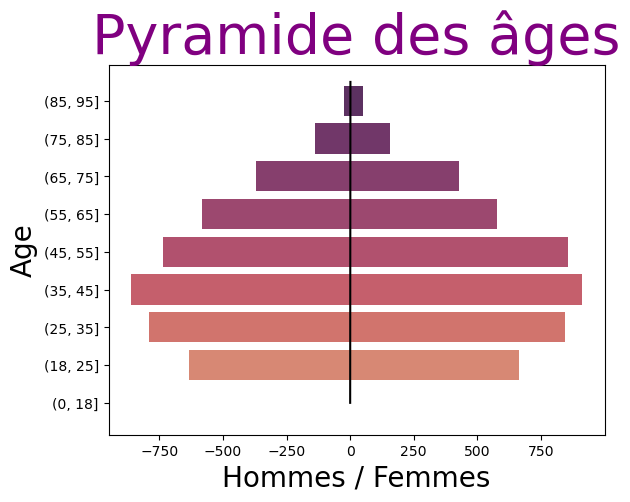

In [78]:
bar = sns.barplot(data=homme_g, x=0, y='group', palette='flare')
bar = sns.barplot(data=femme_g, x=0, y='group', palette='flare')
bar.invert_yaxis()
bar.set(xlabel="Hommes / Femmes/F", ylabel="âge")

plt.plot([0,8.5], color='black')

plt.title('Pyramide des âges', fontsize=40, color='purple')
plt.xlabel('Hommes / Femmes', size = 20)
plt.ylabel('Age', size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.savefig("Pyramide_des_ages.png", dpi=200, bbox_inches = 'tight')

#### Conclusion

Il n'y pas de tranche 0-18 parcque le site ne permet pas l'inscription au moins de 18 ans.

## <a name="C4.20"><font color='black'>4.17 / Répartition du CA entre les clients</font></a>

In [79]:
# Le chiffre d'affaire par client
ca_client = df_final.groupby(['client_id'])[['price']].sum().sort_values('price', ascending=False)
ca_client.head()

,price
client_id,
c_1609,324033.350000
c_4958,289760.340000
c_6714,153669.316768
c_3454,113673.128384
c_3263,5276.870000


Il y a 4 clients qui se démarque par le montant de leur achats

## <a name="C4.21"><font color='black'>4.18 / Etude des clients les plus important dans le CA</font></a>

In [80]:
ca_best_4 = 100*ca_client.head(4).price.sum() / df_final.price.sum()
print ("Les 4 plus gros clients comportent", round(ca_best_4,2),"% du CA total.","ce qui représente" ,round(ca_client.head(4).price.sum(),0),"€")

Les 4 plus gros clients comportent 7.43 % du CA total. ce qui représente 881136.0 €


In [81]:
df_final.price.sum()

11856321.62761265

In [82]:
11856321

11856321

In [83]:
df_best_4_clients = df_final[(df_final.client_id== 'c_1609')|
                              (df_final.client_id=='c_6714')|
                              (df_final.client_id=='c_3454')|
                              (df_final.client_id=='c_4958')]

In [84]:
best_4_clients = df_best_4_clients.groupby(['client_id','sex','birth'])[['price']].sum()
best_4_clients

,,,price
client_id,sex,birth,
c_1609,Homme,1980,324033.350000
c_3454,Homme,1969,113673.128384
c_4958,Homme,1999,289760.340000
c_6714,Femme,1968,153669.316768


## <a name="C4.22"><font color='black'>4.19 / Graphique 4 gros clients sur le CA</font></a>

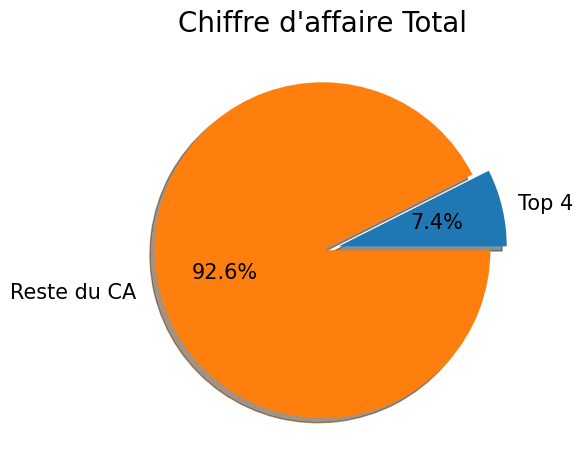

In [85]:
# Graphique sur l'importance des 4 plus gros clients
labels = ["Top 4", "Reste du CA "]
sizes = [ca_best_4, 100-ca_best_4]
explode = (0.1,0)
textprops = {"fontsize":15}
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Chiffre d'affaire Total", fontsize=20)
plt.tight_layout()
plt.savefig("Chiffre_d'affaire_Total", dpi=200, bbox_inches = 'tight')
plt.show()

### _ Conclusion
- Nous trouvons 4 clients qui sont les plus gros acheteurs en terme de prix : 
client_id :c_1609,c_4958,c_6714,c_3454
- Ces clients représentent 7.43 % du CA total ou 881 031€

- L'apport massif de ces 4 gros clients au chiffres d'affaire vont biaiser les futurs analyses, ces clients doivent etre de grandes entreprises.
- Nous allons donc créer un dataframe spécial sans les 4 plus gros clients afin d'avoir une analyses plus proche de la réalité.

## <a name="C4.23"><font color='black'> Création d'un df sans les  4 plus gros clients  `df_final_sgc`</font></a>


- SGC = Sans Gros Client

In [86]:
# Créer le dataframe sans les données des  4 gros clients (SGC)
df_final_sgc = df_final.drop(df_best_4_clients.index).reset_index(drop=True)
df_final_sgc.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge,age
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05,4.18,0,both,36
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02,15.99,1,both,34
2,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06,69.99,2,both,21
3,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01,4.99,0,both,43
4,c_1478,Femme,1972,0_1418,2022-10-20,s_285425,084030,15:59:16,2022,10,20,2022-10,8.57,0,both,50


In [87]:
# Le chiffre d'affaire par client (SGC)
ca_client_sgc = df_final_sgc.groupby(['client_id'])[['price']].sum().sort_values('price', ascending=False)
ca_client_sgc.head()

,price
client_id,
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


### <a name="C4.24"><font color='black'>4.21 / Graphique (courbe de Lorenz) avec et sans "SGC"</font></a>

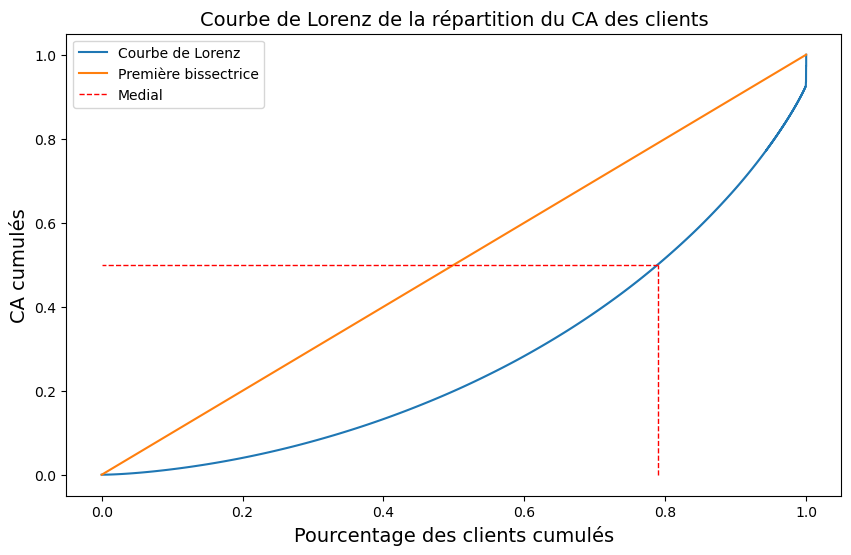

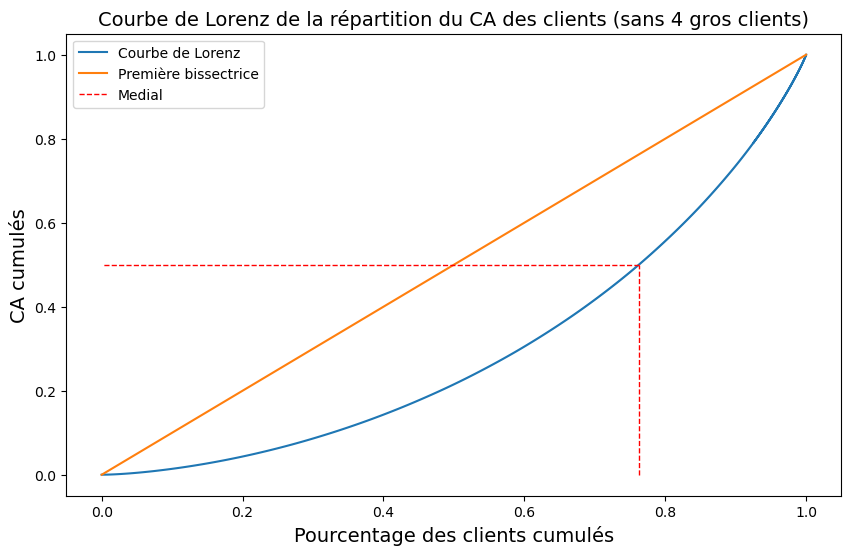

In [88]:
# Courbe de Lorenz avec 4 plus gros clients
n_client = len(ca_client) # la taille du df sur les 4 gros clients
ca_c = ca_client.price.values # le CA des 4 gros clients
lorenz = np.cumsum(np.sort(ca_c)) / ca_c.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
#Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz)) 
plt.figure(figsize =(10,6))
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients',fontsize = 14, color = 'black')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.legend(loc='upper left', fontsize=10)
plt.savefig("Courbe_de_Lorenz", dpi=200, bbox_inches = 'tight')

# Courbe de Lorenz sans les 4 plus gros clients
n_client = len(ca_client) # la taille du df sur les 4 gros clients
ca_c = ca_client_sgc.price.values # le CA des 4 gros clients
lorenz = np.cumsum(np.sort(ca_c)) / ca_c.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
#Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz)) 
plt.figure(figsize =(10,6))
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients (sans 4 gros clients)',fontsize = 14, color = 'black')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.legend(loc='upper left', fontsize=10)

Concentration des variables clients pour le CA cumulés.  
Plus la courbe est éloigné, plus la répartition est inégalitaire.  

- 50% des clients ne dépenses que 20% du CA.
- 80% des clients ne dépenses que 50% du CA.
- les 20% restent dépensent 50% du CA.

In [89]:
# Calcul de l'indice de Gini
AUC_2 = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n_client # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0])
#est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] 
#qui est à moitié au dessus de 1.
S_2 = 0.5 - AUC_2 # surface entre la première bissectrice et le courbe de Lorenz
gini_2 = 2*S_2

In [90]:
print('Le coefficient de Gini avec les 4 gros clients est de:', round(gini_2,3),'.')

Le coefficient de Gini avec les 4 gros clients est de: 0.403 .


L'indice de Gini est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême). Entre 0 et 1, l'inégalité est d'autant plus forte que l'indice de Gini est élevé.

Il est égal à 0 dans une situation d'égalité parfaite où la variable prend une valeur identique sur l’ensemble de la population. À l'autre extrême, il est égal à 1 dans la situation la plus inégalitaire possible, où la variable vaut 0 sur toute la population à l’exception d’un seul individu. .


### <a name="C4.25"><font color='black'>4.22 / Dissociation des femmes et des hommes (SGC)</font></a>

In [91]:
# Calcul le genre et la somme en CA
ca_genre = df_final_sgc.groupby('sex')['price'].sum()
ca_genre

sex
Femme    5.707387e+06
Homme    5.267799e+06
Name: price, dtype: float64

In [92]:
# # Calcul le genre et les ventes
vente_genre = df_final_sgc.groupby('sex')['price'].sum()
vente_genre

sex
Femme    5.707387e+06
Homme    5.267799e+06
Name: price, dtype: float64

### <a name="C4.26"><font color='black'>4.23 /  Graphique de la répartition du CA par genre (SGC)</font></a>

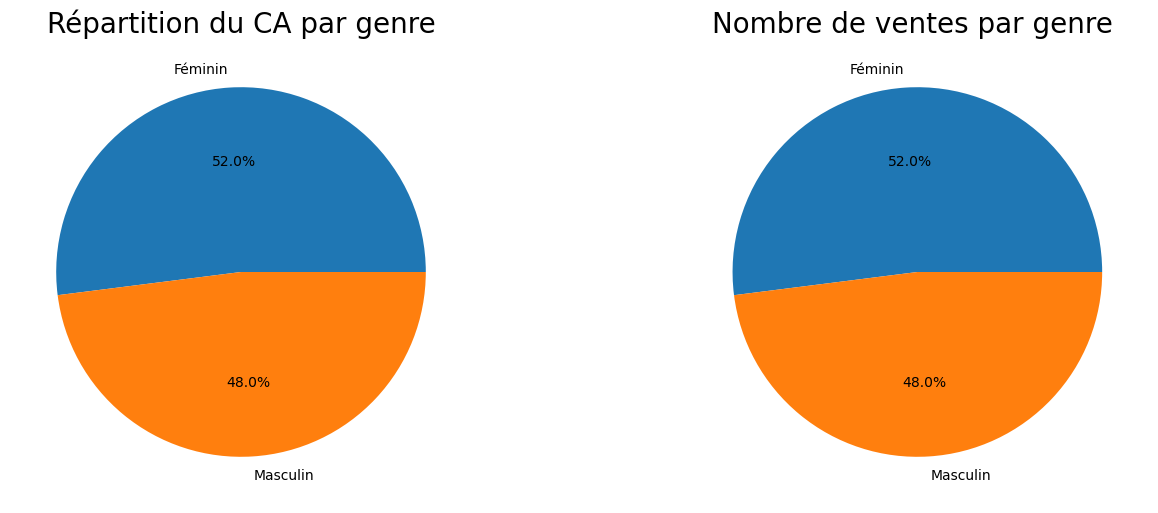

In [93]:
 # Graphique de la répartition du CA par genre (sans les 4 gros clients)
fig = plt.figure(figsize =(16,6)) 

names = ['Féminin', 'Masculin']
ax1 = plt.subplot(1,2,1)
patches, l_text, p_text=plt.pie(ca_genre, labels=names, autopct='%.1f%%')
plt.title("Répartition du CA par genre", fontsize = 20, color = 'black')

    
# Visualisation le nombre de ventes par sexe (sans les 4 gros clients)
ax2 = plt.subplot(1,2,2)
patches, l_text, p_text=plt.pie(vente_genre, labels=names, autopct='%.1f%%')
plt.title("Nombre de ventes par genre ", fontsize = 20, color = 'black')
plt.savefig("Répartition_du_CA_par_genre", dpi=200, bbox_inches = 'tight')

#### Conclusion
- La répartition du CA par genre est égale entre Hommes et Femmes
- La répartition du CA par genre est égale entre Hommes et Femmes 

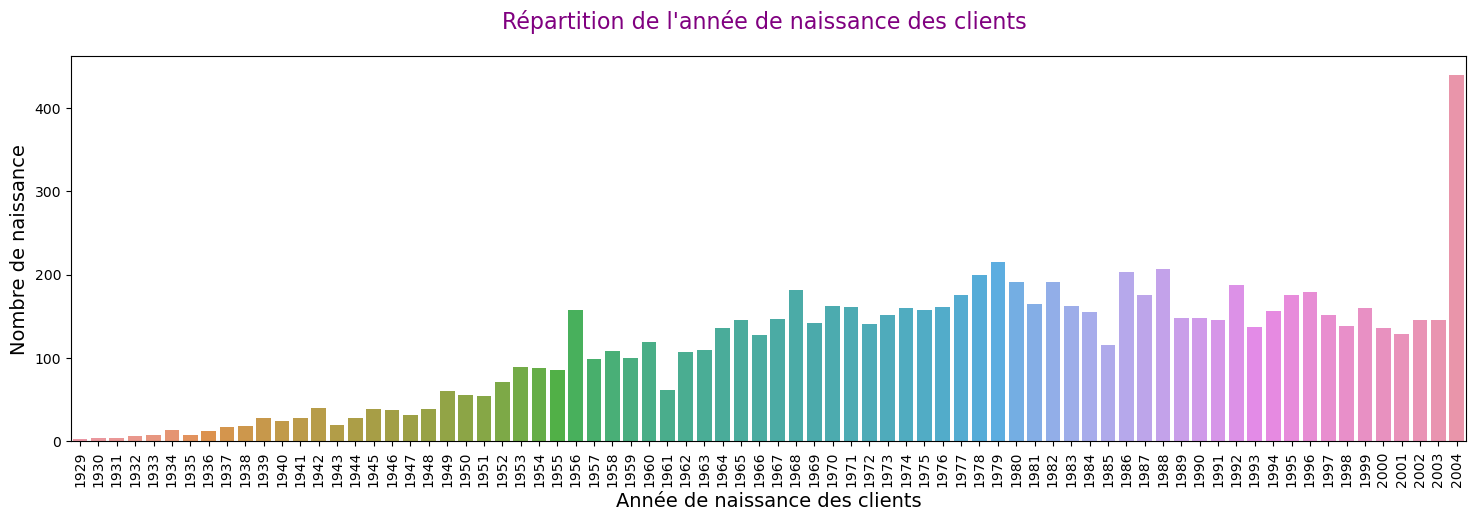

In [94]:
# Graphique sur la répartition de l'année de naissance des clients
fig = plt.figure(figsize =(18,5))
sns.countplot(x=customers.birth)
plt.xlabel("Année de naissance des clients",fontsize = 14, color = 'black')
plt.ylabel("Nombre de naissance", fontsize = 14, color = 'black')
plt.title("Répartition de l'année de naissance des clients ", fontsize = 16, color = 'purple', y= 1.05)
plt.xticks(fontsize = 10, rotation=90)
plt.yticks(fontsize = 10)
plt.savefig("Répartition_de_lannée_de_naissance_des_clients", dpi=200, bbox_inches = 'tight')

Il y a un grand nombre de client en 2004, parcque le site ne permet pas l'inscription avant 18ans.
La déclaration de l'age minimal pour acheter est donc 18ans.

# <a name="C5">Partie 5 Mission de Julie</a>

**J’aimerais que tu regardes en particulier :** 
- Le lien entre le genre d’un client et les catégories des livres achetés.
- Le lien entre l’âge des clients
- Le montant total des achats
- La fréquence d’achat
- La taille du panier moyen 

## <a name="C5.1"><font color='black'>5.1 /  Lien entre le genre et les catégories de livres achetés</font></a>

In [95]:
#Création d'un tableau avec les calculs par genre et catégorie sans gros clients
genre_categ_sgc = df_final_sgc[['categ', 'sex']].pivot_table(index='categ', columns='sex',aggfunc=len, margins=True, margins_name='total')
genre_categ_sgc

sex,Femme,Homme,total
categ,,,
0,200904,186589,387493
1,111331,101017,212348
2,16980,15868,32848
total,329215,303474,632689


### Tableau pour la Heatmap par catégorie selon le genre

In [96]:
X = "sex"
Y = "categ"

cont = df_final_sgc[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
Femme,200904,111331,16980,329215
Homme,186589,101017,15868,303474
Total,387493,212348,32848,632689


###  <a name="C5.2"><font color='black'>5.2 /  Graphique Heatmap d'achats par catégorie selon le genre</font></a>

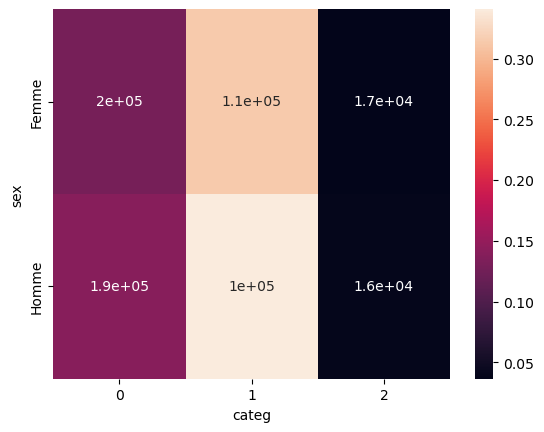

In [97]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final_sgc)
indep = tx.dot(ty) / n

measure = (cont-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1])
plt.savefig("Heatmap", dpi=200, bbox_inches = 'tight')
plt.show()

Chaque case à une valeur comprise entre 0 et 1, qui nous sert à étalonner la couleur.   
On peut considérer cette valeur  comme une contribution à la non-indépendance.   
Plus cette contribution sera proche de 1, plus la case en question sera source de non-indépendance.  

Plus c'est clair, plus c'est corrélé positivement.  
Plus c'est foncé, plus c'est corrélé négativement. 

### Conclusion:
Avec la heatmap, on constate que:

- Les femmes et les hommes  s'intéressent plus aux catégories 0 et 2.
- La catégorie la plus fortement lié au genre est la catégorie 0 et la moins lié est la catégorie 2.  

**Il est à prendre en compte que les femmes sont plus nombreuses, cela peut influer sur le résultat.**

### <a name="C5.3"><font color='black'>5.3 /  Test de Khi-2</font></a>

Le test du Khi² permet de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence.  

On émets les deux hypothèses suivantes:  
H0 : Variables indépendantes si valeur critique > 5%  
H1 : Variables dépendantes si valeur critique < 5%


In [98]:
# Test de Khi-2 avec les gros clients
chi2, pvalue, degrees, expected = stats.chi2_contingency(genre_categ_sgc)
chi2, degrees, pvalue

(20.200173796862927, 6, 0.002551063708568263)

### Test Cramer's V

*Test la force du lien*

In [99]:
N= cont.sum().sum()
minimum_dimension = min(cont.shape)-1

X2 = st.chi2_contingency(cont, correction=False)[0]
result = np.sqrt((X2/N) / minimum_dimension)

print(result)

0.0019977328800928544


<font color='darkred'>Afin de vérifier si nos variables sont indépendantes ou non, nous allons comparer xi_n à la valeur critique au seuil de 5%.</font>

<font color='darkred'>Le tableau de contingence contient (2lignes-1) * (3colonnes-1) = 2 degrés de liberté.  
Dans la table de loi du Khi2, pour une p-valeur de 0.05, on obtient une valeur critique de 5.99.</font>

#### *Conclusion:*
- Notre p-value étant de 0.0025 et < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables genre et catégorie de produits sont dépendantes.  
- Le test de Cramer's V indique une relation faible car elle se situe entre 0.10 < 0.30


##  <a name="C5.4"><font color='black'>5.4 / Lien entre l'âge et la catégorie des produits achetés</font></a>
- Test de Shapiro
- Graphique box.plot
- Test de Kolmogorov-Smirnov 
- Test de Kruskal-Wallis
- Test Anova (essai)

###   <a name="C5.5"><font color='black'>5.5 / Test de Shapiro</font></a>
On teste l'hypothèse nulle selon laquelle les données ont été tirées d'une distribution normale.    
Lorsque la valeur p est inférieure ou égale au seuil Alpha 0,05 (un niveau de confiance de 95 %)

Ho(Accepté) : l'échantillon provient des distributions normales.(Po>0,05)  
Ha(rejeté) : l'échantillon ne provient pas des distributions normales.

In [100]:
st.shapiro(df_final['age'])

ShapiroResult(statistic=0.9744337201118469, pvalue=0.0)

#### Conclusion :
La pvalue  est de '0.0', on en déduit que la distribution ne suit pas une loi normale.  
**L'hypothées Ho est rejetée.**

Le décimal n'étant pas assez précis, je vais dans le doute continuer les tests.

###   <a name="C5.6"><font color='black'>5.6 / Graphique Dispersion des âges par catégorie</font></a>

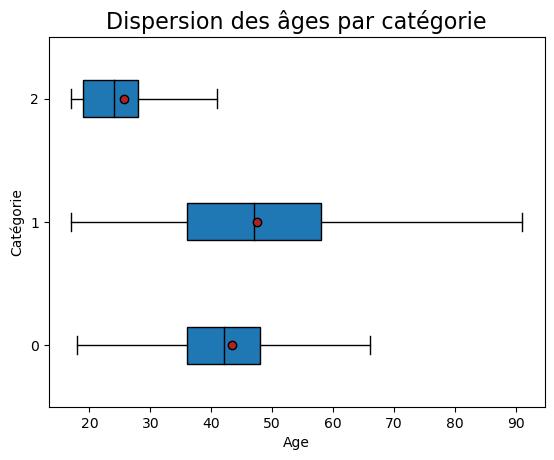

In [101]:
# Dispersion des Ages des clients par catégorie (boxplot) v.2
X = "categ" # qualitative
Y = "age" # quantitative

modalites = df_final_sgc[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_final_sgc[df_final_sgc[X]==m][Y])
    plt.title('Dispersion des âges par catégorie',fontsize= 16, color = 'black')
    plt.xlabel('Age')
plt.ylabel('Catégorie')

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.savefig("Heatmap", dpi=200, bbox_inches = 'tight')
plt.show()

#### Conclusion
Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.  

**- La moyenne d'âge des clients qui achètent des livres de catégorie 2 est plus petite que celle d'autres catégories et sa distribution est plus concentrée.**  

**- Les moyennes d'âge des catégories 0 et 1 sont assez proches, mais la distribution d'âge de la catégorie 1 est plus étalée que celle de la catégorie 0.**

###  <a name="C5.7"><font color='black'>5.7 / Test de Kolmogorov-Smirnov</font></a>
- vérification de la normalité de chaque groupe de la variable 'categ'
Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:  
H0:la variable suit une loi normale  
H1:la variable ne suit pas une loi normale

In [102]:
ca_0 = df_final_sgc[df_final_sgc['categ'] == 0]['age']
ca_1= df_final_sgc[df_final_sgc['categ'] == 1]['age']
ca_2 = df_final_sgc[df_final_sgc['categ'] == 2]['age']

In [103]:
# Test la normalité pour les données de catégorie 0
test_stat_0 =kstest(ca_0, 'norm')
test_stat_0

KstestResult(statistic=1.0, pvalue=0.0)

In [104]:
# Test la normalité pour les données de catégorie 1
test_stat_1 =kstest(ca_1, 'norm')
test_stat_1

KstestResult(statistic=1.0, pvalue=0.0)

In [105]:
# Test la normalité pour les données de catégorie 2
test_stat_2 =kstest(ca_2, 'norm')
test_stat_2

KstestResult(statistic=1.0, pvalue=0.0)

Pour ces 3 catégories les p_valeurs sont < 0.5; nous rejetons l’hypothèse nulle, aussi la variable âge ne suit pas une loi normale.

**Vu que la variable âge ne suit pas la loi normale et que les variances de chaque groupe ne sont pas égales, alors je ne peux pas utiliser ANOVA; j'utilse donc le test de Kruskal – Wallis qui est équivalent à ANOVA, mais non paramétrique, en utilisant les médianes au lieu des moyennes.**

###  <a name="C5.8"><font color='black'>5.8 / Test de Kruskal-Wallis</font></a>

In [106]:
stats.kruskal(ca_0, ca_1, ca_2)

KruskalResult(statistic=72325.29690477607, pvalue=0.0)

**Conclusion:**  
- p_valeur < 0.05, nous rejetons l’hypothèse nulle, donc les médians de chaque groupe de catégorie ne sont pas égaux.

###  <a name="C5.9"><font color='black'>5.9 / Test Anova (essai)</font></a>
Je realise un test de ANOVA, même si les données ne s'y prêtent pas.

In [107]:
X = "categ" # qualitative
Y = "age" # quantitative
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_s  =eta_squared(df_final_sgc['categ'], df_final_sgc['age'])
eta_s

0.11330750071111796

Eta-squared (η2) est utilisé pour estimer la taille d'entrée pour l'estimation de la puissance ou de la taille de l'échantillon.   

### ***Conclusion:***  
- Avec le rapport de corrélation  0.11330750071111796 , on identifie un lien faible entre l’âge des clients et les catégories des livres achetés.

##  <a name="C5.10"><font color='black'>5.10 / Lien entre l'age et le montant total des achats</font></a>

In [108]:
df_agg = df_final_sgc.groupby('client_id').agg(CA = pd.NamedAgg(column='price', aggfunc = 'sum'),
                                 freq = pd.NamedAgg(column='price', aggfunc = 'count'),
                                 age = pd.NamedAgg(column='age', aggfunc = 'max')).reset_index()
df_agg.head()

,client_id,CA,freq,age
0,c_1,558.18,39,68
1,c_10,1353.60,58,67
2,c_100,254.85,8,30
3,c_1000,2261.89,125,57
4,c_1001,1812.86,102,41


###  <a name="C5.11"><font color='black'>5.11 / Graphique Montant total des achats par âge des clients </font></a>

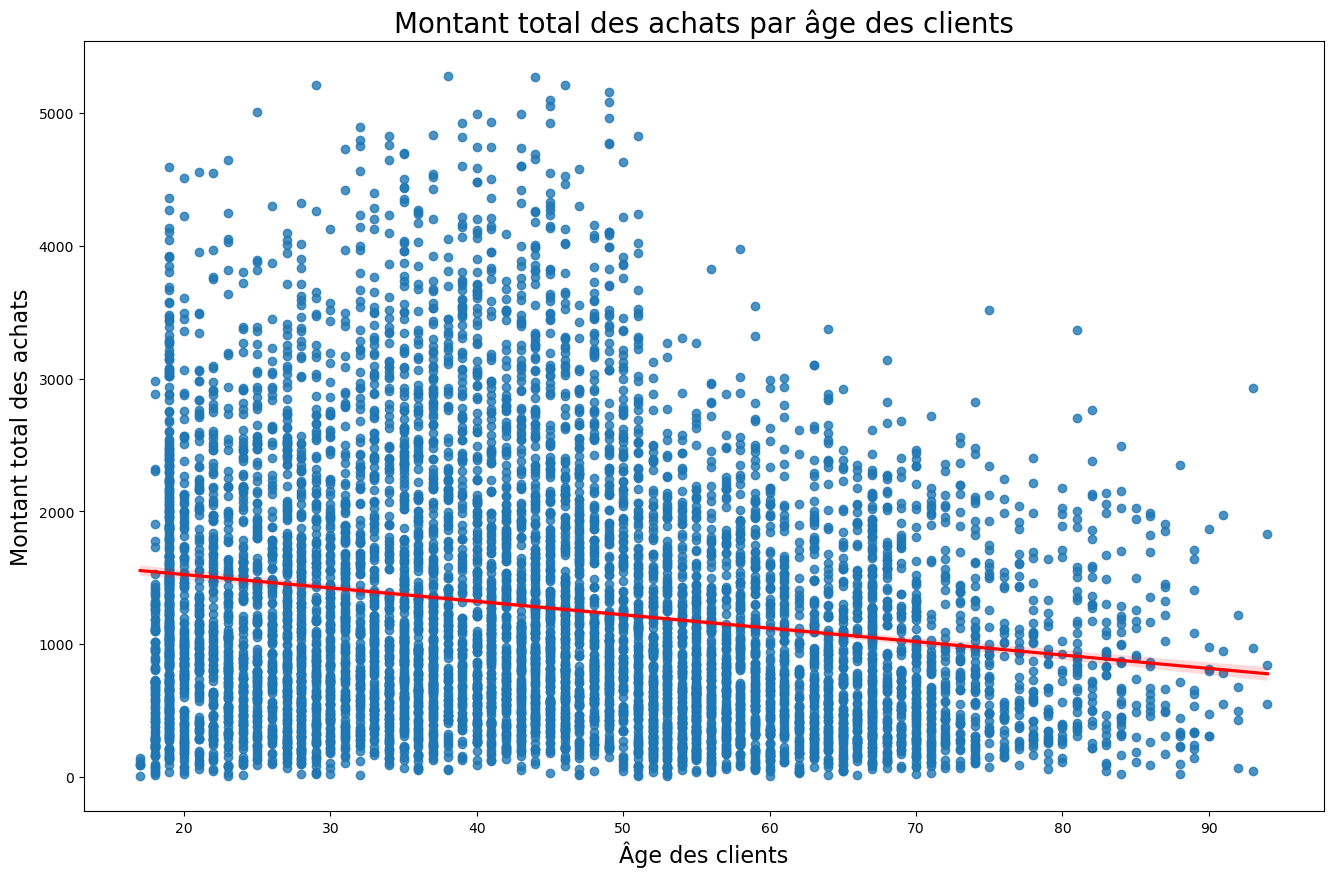

In [109]:
# Graphique Montant total des achats par âge des clients (nuages de points)
plt.figure(figsize=(16, 10))
sns.regplot(x='age', y='CA', data = df_agg,line_kws={"color": "red"})
plt.ylabel('Montant total des achats',fontsize= 16)
plt.xlabel('Âge des clients',fontsize= 16)
plt.title("Montant total des achats par âge des clients",fontsize= 20, color = 'black')
plt.savefig("Montant_total_des_achats_par_age_des_clients", dpi=200, bbox_inches = 'tight')

###   <a name="C5.12"><font color='black'>5.12 / Test de Pearson </font></a>
- Le coefficient de Pearson permet de mesurer le niveau de corrélation entre les deux variables.   
- Il renvoie une valeur entre -1 et 1.   
- S'il est proche de 1 cela signifie que les variables sont corrélées.  
- Proche de 0 que les variables sont décorrélées et proche de -1 qu'elles sont corrélées négativement.

In [110]:
ma  = df_agg.groupby('age',as_index=False)['CA'].sum()
pearsonr(ma['CA'], ma['age'])

PearsonRResult(statistic=-0.757737675620042, pvalue=9.719980280000232e-16)

#### Conclusion    
On obtient un coefficient de -0.75. Il représente une corrélation fortement négative de nos 2 variables (visible aussi par régression linéaire).   
Quand on regarde le graphique, on peut voir que cette corrélation concerne les clients qui ont plus de 50 ans.  


##  <a name="C5.13"><font color='black'>5.13 / Lien entre l'age et la fréquence d'achats </font></a>

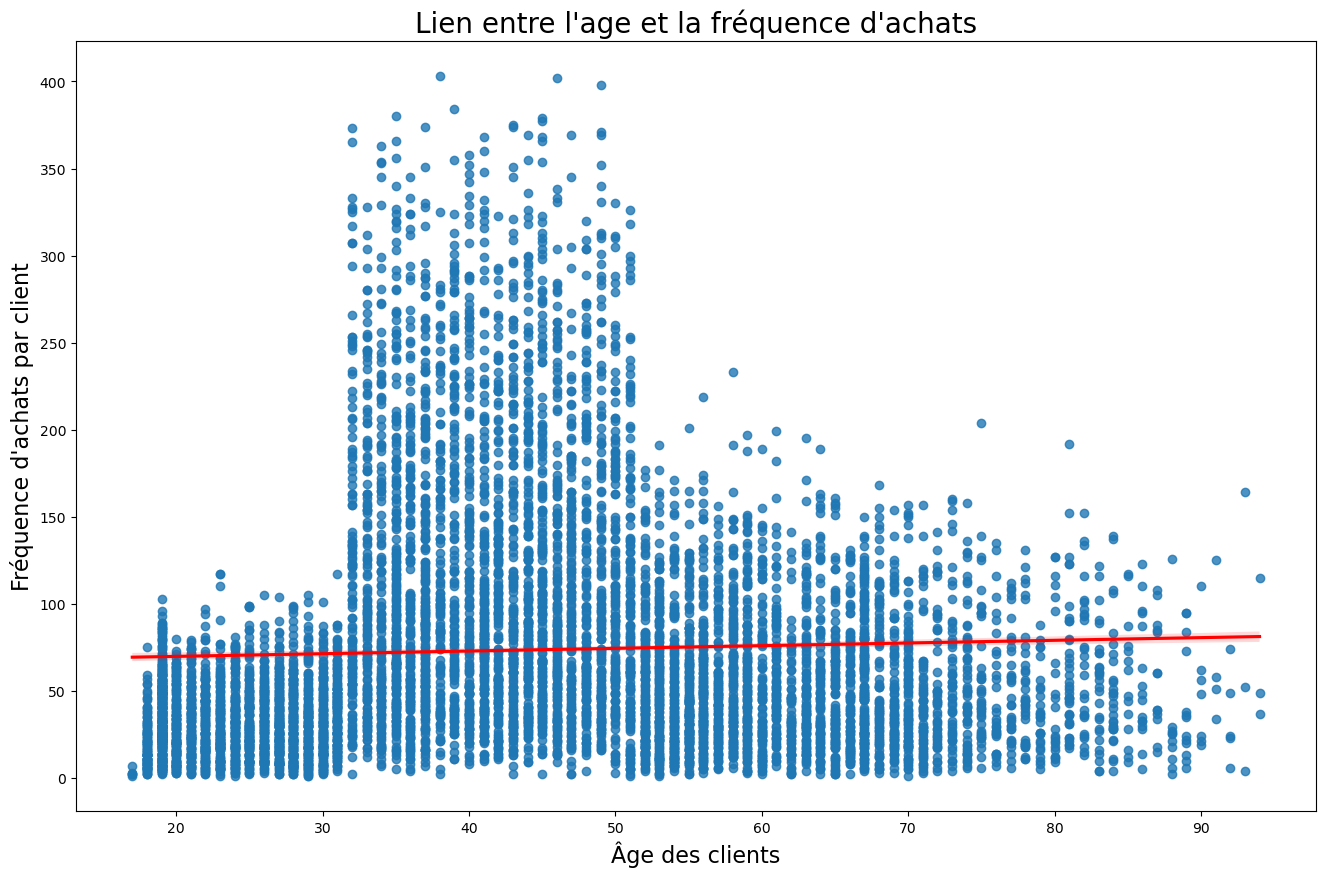

In [111]:
# Graphique Montant total des achats par âge des clients (nuages de points)
plt.figure(figsize=(16, 10))
sns.regplot(x='age', y='freq', data = df_agg, line_kws={"color": "red"})
plt.ylabel("Fréquence d'achats par client",fontsize= 16)
plt.xlabel('Âge des clients',fontsize= 16)
plt.title("Lien entre l'age et la fréquence d'achats",fontsize= 20, color = 'black')
plt.savefig("Lien_entre_lage_et_la_fréquence_dachats", dpi=200, bbox_inches = 'tight')

### <a name="C5.14"><font color='black'>5.14 /Test de pearson </font></a>

In [112]:
ma2  = df_agg.groupby('age',as_index=False)['freq'].sum()
pearsonr(ma2['freq'], ma2['age'])

PearsonRResult(statistic=-0.5015866211184673, pvalue=2.8962146810031396e-06)

#### Conclusion    
Avec le test de Pearson, on obtient un coefficient de -0.50. Il représente une corrélation légèrement négative de nos 2 variables (visible aussi par régression linéaire).   
Quand on regarde le graphique, on peut voir que cette corrélation concerne plutôt les clients à partir de 50 ans.  

Cependant, on ne retrouve pas cette relation pour les clients de moins de 50 ans:
- Pour les moins de 30 ans, la fréquence d'achat est autour de 80.
- Pour les clients entre 31 et 50 ans, la fréquence est plus haute autour des 300.
- Pour les clients  qui ont plus 50 ans la fréquence diminue et est légerement plus éléve que celle des moins de 30ans


## <a name="C5.15"><font color='black'>5.15 /Lien entre l'âge et la taille du panier moyen </font></a>

In [113]:
# Ajout d'une colonne avec le panier moyen
df_agg["panier_moyen"] = df_agg["CA"] / df_agg["freq"]
df_agg.head()

,client_id,CA,freq,age,panier_moyen
0,c_1,558.18,39,68,14.312308
1,c_10,1353.60,58,67,23.337931
2,c_100,254.85,8,30,31.856250
3,c_1000,2261.89,125,57,18.095120
4,c_1001,1812.86,102,41,17.773137


### <a name="C5.16"><font color='black'>5.16 / Graphique entre l'âge et la taille du panier moyen </font></a>

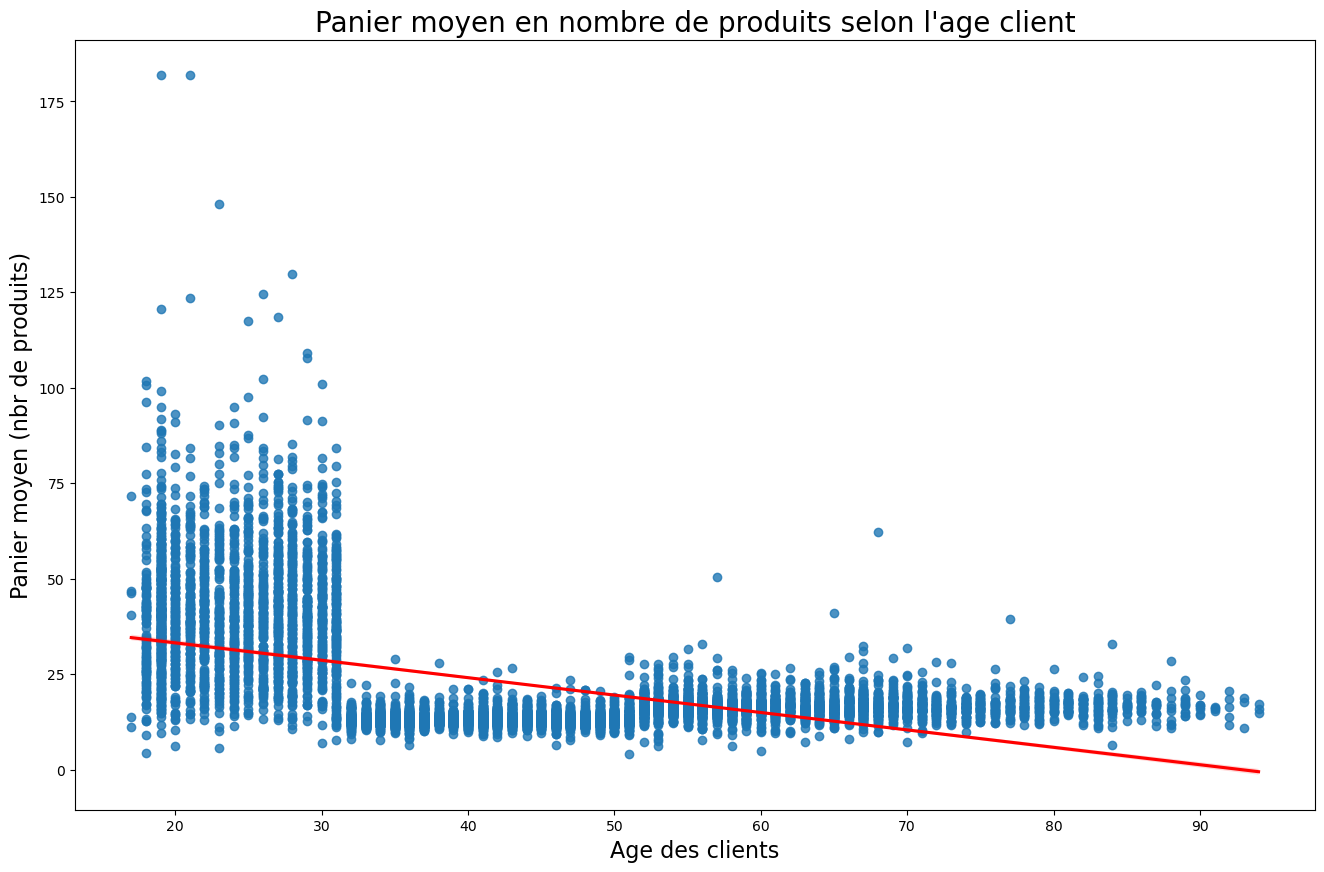

In [114]:
# Graphique Montant total des achats par âge des clients (nuages de points)
plt.figure(figsize=(16, 10))
sns.regplot(x='age', y='panier_moyen', data = df_agg, line_kws={"color": "red"})
plt.ylabel("Panier moyen (nbr de produits)",fontsize= 16)
plt.xlabel('Age des clients',fontsize= 16)
plt.title("Panier moyen en nombre de produits selon l'age client",fontsize= 20, color = 'black')
plt.savefig("Panier_moyen_en_nombre_de_produits_selon_lage_client", dpi=200, bbox_inches = 'tight')

### <a name="C5.17"><font color='black'>5.17 / Test de Pearson </font></a>

In [115]:
ma3  = df_agg.groupby('age',as_index=False)['panier_moyen'].sum()
pearsonr(ma3['panier_moyen'], ma2['age'])

PearsonRResult(statistic=-0.7389125348454197, pvalue=1.1361058944904839e-14)

### **Conclusion:**
  
On obtiens un coefficient de -0.73. Celà représente une corrélation fortement négative des 2 variables.   

- Les clients de moins de 30 ans ont le panier moyen le plus élevé avec un montant assez constant autour des 70 euros.  
- Les clients entre 31-50 ans ont le panier moyen le plus bas avec un montant quasi constant autour de 20 euros.
- Les clients à partir de 50 ans ont une taille de panier moyen à montant quasi constant, mais un peu plus élevé autour de 25 euros.

## <a name="C5.16"><font color='black'>5.16 /Lien entre les tranches d'âges et les catégories </font></a>

## Création d'un Heatmap par tranche d'âge

In [116]:
# # Définir les tranches d'âge
df_final_sgc['age_tranche']= pd.cut(df_final_sgc['age'], bins=[18,30,60,95])
df_final_sgc.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,annee,mois,jour,annee_mois,price,categ,_merge,age,age_tranche
0,c_103,Femme,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,2022-05,4.18,0,both,36,"(30, 60]"
1,c_8534,Homme,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,2022-02,15.99,1,both,34,"(30, 60]"
2,c_6941,Homme,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,2021-06,69.99,2,both,21,"(18, 30]"
3,c_4232,Homme,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,2023-01,4.99,0,both,43,"(30, 60]"
4,c_1478,Femme,1972,0_1418,2022-10-20,s_285425,084030,15:59:16,2022,10,20,2022-10,8.57,0,both,50,"(30, 60]"


In [117]:
x = 'age_tranche'
y = 'categ'
cont_age = df_final_sgc[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total' )
cont_age

categ,0,1,2,Total
age_tranche,,,,
"(18, 30]",18751,23528,23520,65799
"(30, 60]",328912,136696,2371,467979
"(60, 95]",36312,46253,775,83340
Total,383975,206477,26666,617118


**- Test de Khi2**  
Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:  
H0: Les deux variables (les tranches d'âge des clients et les catégories des livres achetés ) sont indépendantes  
H1: les deux variables ne sont pas indépendantes

In [118]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(cont_age)
chi2, degrees, pvalue

(204648.17127756108, 9, 0.0)

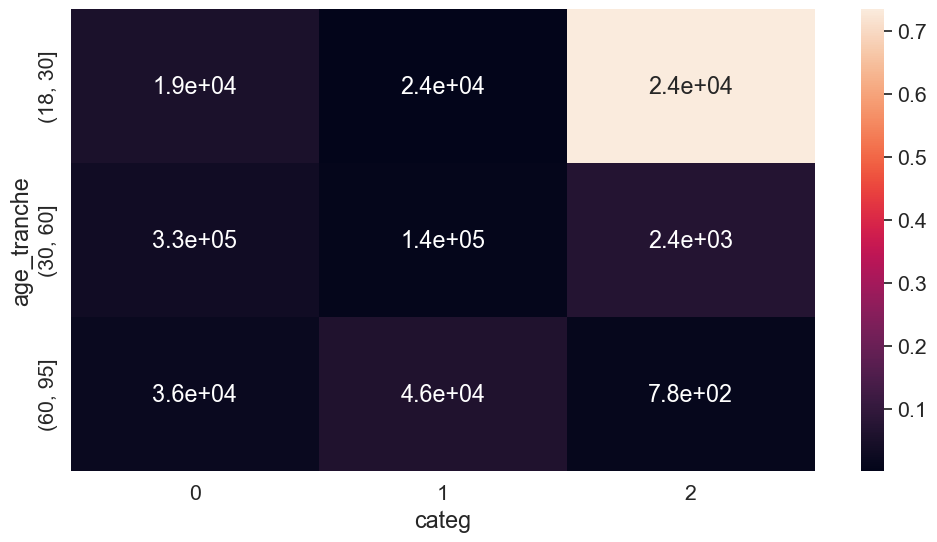

In [121]:
tx = cont_age.loc[:,["Total"]]
ty = cont_age.loc[["Total"],:]
n = len(df_final_sgc)
indep = tx.dot(ty) / n

c = cont_age.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table_2 = measure/xi_n
sns.heatmap(table_2.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
sns.set(rc={'figure.figsize': (12, 6)},font_scale=1.4)
plt.savefig("Heatmap_par_tranche_dage", dpi=200, bbox_inches = 'tight')

### Test de Cramer's V

In [120]:
N= cont_age.sum().sum()
minimum_dimension = min(cont_age.shape)-1

X2 = st.chi2_contingency(cont_age, correction=False)[0]
result = np.sqrt((X2/N) / minimum_dimension)

print(result)

0.16623757847647874


***Conclusion:***  
- Notre p-value étant de 0 et < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables tranche d'âge et catégorie de produits sont dépendantes.
- Avec le heatmap, on trouve faible corrélation sur les moins de 30 ans et la catégorie 2 de produits: la catégorie 2 est la préférée des jeunes. Il serait donc opportun de cibler cette catégorie d'âge lors des campagne de publicité concernant les produits de la catégorie 2.  
- Le test de Cramer's V indique une relation faible car elle se situe entre 0.10 < 0.30

# <a name="C5.18"> Conclusions de la mission</a>

- Les corrélations sont difficiles à démontrer car elles sont toutes trés faibles.  
 *Même faible des corrélations sont à noter afin de cibler les publicités.*
- Les plus gros clients sont certainement des entreprises, il pourrait être intéressant de leur proposer de nouvelles offres.  
 *Démarcher de nouvelles entreprises afin d’accroitre le CA.*

- La restriction d’âge sur le site n’a pas l’air de bloquer les jeunes acheteurs, cette restriction pourrait être seulement pour des ouvrages spécialisés.

- Concernant l’année 2023 :  
Les plus grosses ventes se font en fin d’année et les données que l’on possèdent représentent cette baisse régulière sur tous les ans.
Il pourrait être intéressant de proposer des offres après les fêtes de fin d’années afin d’atténuer cette baisse financière.